# European Call and Put Option Contracts

**2025 Introduction to Quantiative Methods in Finance**

**The Erdös Institute**

In [2]:
#Package Import
import numpy as np
import pandas as pd
import yfinance as yf
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

### Call Option

A **European call option** is a contract between two parties, a buyer and a seller, that gives the buyer the right, but not the obligation, to buy an underlying asset to the seller for a predetermined price $K$, called the **strike price** at a future point of time.


### Put Option

A **European put option** is a contract between two parties, a buyer and a seller, that gives the buyer the right, but not the obligation, to sell an underlying asset to the seller for a predetermined price $K$, called the **strike price** at a future point of time.


### Option Terminology
- **Premium**: The price paid by the option buyer to the option seller for obtaining the right. It represents the cost of the option.
- **Strike Price**: The predetermined price at which the underlying asset can be bought or sold.
- **Expiration Date**: The date when the option contract expires. After this date, the option is no longer valid.
- **Time to Expiration**: The amount of time in years to contract expiration date.
- **In-the-Money (ITM)**: For a call option, when the market price is above the strike price. For a put option, when the market price is below the strike price.
- **Out-of-the-Money (OTM)**: For a call option, when the market price is below the strike price. For a put option, when the market price is above the strike price.
- **At-the-Money (ATM)**: When the market price is equal to the strike price.
- **Spot Price/Asset Price**: Price of the underlying asset.

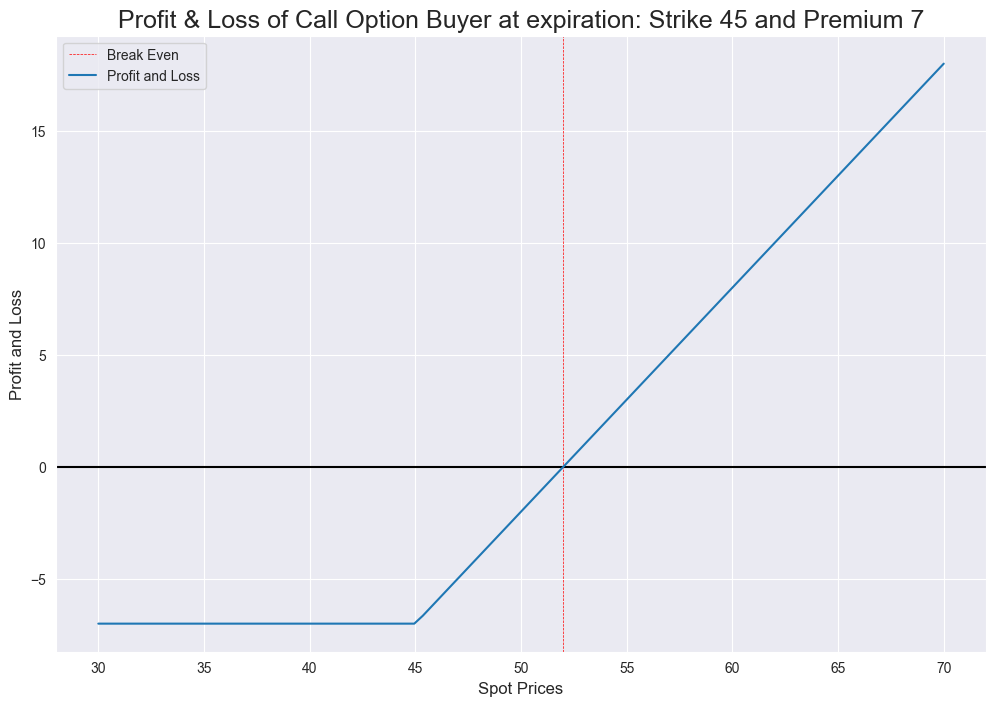

In [4]:
### Create a P&L graph of Call Option -- Buyer

K = 45
premium = 7 

spot_prices = np.linspace(30,70,100) 

profit_loss = np.maximum(spot_prices -K, 0) - premium

plt.figure(figsize = (12,8))

plt.axhline(0, color = 'black')
plt.axvline(K+premium, color = 'red', ls = '--', lw = '.5', label = 'Break Even')

plt.title(f'Profit & Loss of Call Option Buyer at expiration: Strike {K} and Premium {premium}', size=18)
plt.xlabel('Spot Prices', size = 12)
plt.ylabel('Profit and Loss', size = 12)

plt.plot(spot_prices,profit_loss, label = 'Profit and Loss')
plt.legend()

plt.show()

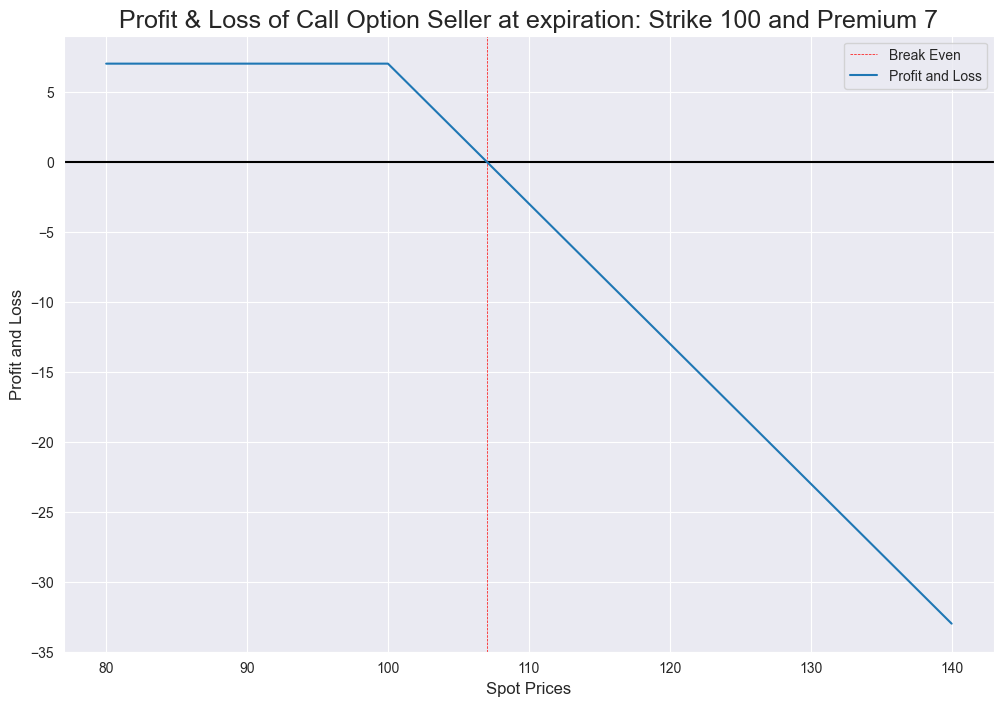

In [45]:
### Create a P&L graph of Call Option -- Seller

K = 100
premium = 7


spot_prices = np.linspace(80,140,100) 

profit_loss = -np.maximum(spot_prices -K, 0) +premium

plt.figure(figsize = (12,8))

plt.axhline(0, color = 'black')
plt.axvline(K+premium, color = 'red', ls = '--', lw = '.5', label = 'Break Even')

plt.title(f'Profit & Loss of Call Option Seller at expiration: Strike {K} and Premium {premium}', size=18)
plt.xlabel('Spot Prices', size = 12)
plt.ylabel('Profit and Loss', size = 12)

plt.plot(spot_prices,profit_loss, label = 'Profit and Loss')
plt.legend()

plt.show()

### Black-Scholes Equation of Call and Put Options

Let $t>0$ and assume that the distribution $S(t)$ of endpoints of a stock path from time $0$ to time $t$ is the standard Black-Scholes model:
$$S(t) = S(0)e^{(-r-\frac{\sigma^2}{2})t + \sigma\sqrt{t}\mathcal{N}(0,1)}.$$
Let $\Phi$ be the standard normal cummulative distribution function:
$$\Phi(y) = \mbox{Prob}(\mathcal{N}(0,1)\leq y) = \frac{1}{\sqrt{2\pi}}\int_{-\infty}^y e^{-\frac{z^2}{2}}\,dz.$$

Let $K>0$ and $C(t)$, respectively $P(t)$, the distribution of payoffs of a call option, respectively put option, with strike price $K$ and whose time to expiration is $t$. Let $C(0)$, respectively $P(0)$, be the expected value of $P(t)$ and $C(t)$ at time $0$. Then
$$C(0) = S(0)\Phi(d_1) - K e^{-rt}\Phi(d_2) \quad \mbox{and} \quad P(0) = -S(0)\Phi(-d_1) + K e^{-rt}\Phi(-d_2)$$
where
$$d_1 = \frac{\ln\left(\frac{S(0)}{K}\right) + (r+\frac{\sigma^2}{2})t}{\sigma \sqrt{t}} \quad \mbox{and} \quad d_2 = \frac{\ln\left(\frac{S(0)}{K}\right) + (r-\frac{\sigma^2}{2})t}{\sigma \sqrt{t}}.$$



In [6]:
# scipy.stats has function norm.cdf that estimates the CDF of the standard normal distribution

from scipy.stats import norm

In [62]:
# Write functions that finds Black-Scholes value of call and put options

def bs_call(S0, K, sigma, t=1, r=0):
    """
    Description:
    
    Computes the Black-Scholes value of a European call option.
    
    Parameters:
        S0: Current asset price
        K: Strike price
        sigma: Yearly standard deviation of log-returns (volatility)
        t: Time to expiration (in years)
        r: Risk-free interest rate
    
    Returns:
        Call option price
    """
    d1 = (np.log(S0/K) + (r+.5*sigma**2)*t)/(sigma*np.sqrt(t))
    #d2 = (np.log(S0/K) + (r-.5*sigma**2)*t)/(sigma*np.sqrt(t))
    d2 = d1 - sigma*np.sqrt(t)
    return S0*norm.cdf(d1)-K*np.exp(-r*t)*norm.cdf(d2)


def bs_put(S0, K, sigma, t=1, r=0):
    """
    Description:
    
    Computes the Black-Scholes value of a European put option.
    
    Parameters:
        S0: Current asset price
        K: Strike price
        sigma: Yearly standard deviation of log-returns (volatility)
        t: Time to expiration (in years)
        r: Risk-free interest rate
    
    Returns:
        Put option price
    """
    
    d1 = (np.log(S0/K) + (r+.5*sigma**2)*t)/(sigma*np.sqrt(t))
    #d2 = (np.log(S0/K) + (r-.5*sigma**2)*t)/(sigma*np.sqrt(t))
    d2 = d1 - sigma*np.sqrt(t)
    return -S0*norm.cdf(-d1)+K*np.exp(-r*t)*norm.cdf(-d2)
    

In [59]:
#Test Black-Scholes Functions

S0 = 100
K = 100
sigma = .3 
tte = 1
rate = 0.03

call_value = bs_call(S0, K, sigma, t = tte, r = rate)
put_value = bs_put(S0, K, sigma, t = tte, r = rate)



print(f'The Black-Scholes Price of a Call Option expiring in {tte:.4f} years whose underlying has market value {S0}, yearly volatility is {sigma}, with strike price {K} is ${call_value: .4f}')
print('---'*17)

print('---'*17)

print(f'The Black-Scholes Price of a Put Option expiring in {tte:.4f} years whose underlying has market value {S0}, yearly volatility is {sigma}, with strike price {K} is ${put_value: .4f}')

The Black-Scholes Price of a Call Option expiring in 1.0000 years whose underlying has market value 100, yearly volatility is 0.3, with strike price 100 is $ 13.2833
---------------------------------------------------
---------------------------------------------------
The Black-Scholes Price of a Put Option expiring in 1.0000 years whose underlying has market value 100, yearly volatility is 0.3, with strike price 100 is $ 10.3279


### Put-Call Parity

The **put-call parity** relates the prices of a call and a put option with the same strike $K$ and time to expiration $t$ as follows:

$$
C(0) - P(0) = S(0) - K e^{-rt}
$$

Where:
- $C(0)$: Black-Scholes price of the European **call** option at time 0
- $P(0)$: Black-Scholes price of the European **put** option at time 0
- $S(0)$: Current stock price  
- $K$: Strike price of the options  
- $r$: Risk-free interest rate  
- $t$: Time to expiration (in years)

In [61]:
#Test our functions for call and put values respects put-call parity
call_value - put_value , S0-K*np.exp(-rate*tte)

(2.9554466451491805, 2.9554466451491805)

In [34]:
###Create matrices of Black-Scholes Call and Put Prices

# Black-Scholes Parameters
S0 =  95   # Spot price
sigma =  .3   # Volatility
r =    0    # Risk-free rate

# Grid of strike prices and times to expiration
strike_vals =   np.linspace(90,100, 11)    
time_vals =   np.linspace(1/12, 1, 12)     

# Create call price matrix
call_matrix = np.zeros((len(time_vals), len(strike_vals)))

for i, t in enumerate(time_vals):
    for j, K in enumerate(strike_vals):
        call_matrix[i, j] = bs_call(S0, K, sigma, t, r)

# Build call price matrix
call_matrix = np.zeros((len(time_vals), len(strike_vals)))

for i, t in enumerate(time_vals):
    for j, K in enumerate(strike_vals):
        call_matrix[i, j] = np.round(bs_call(S0, K, sigma, t, r),2)

# Create Call DataFrame
call_df = pd.DataFrame(call_matrix, index=np.round(time_vals, 3), columns=np.round(strike_vals, 2))
call_df.index.name = "Time to Expiration (years)"
call_df.columns.name = "Call Strike Price"


# Create put price matrix
put_matrix = np.zeros((len(time_vals), len(strike_vals)))


# Build call price matrix
put_matrix = np.zeros((len(time_vals), len(strike_vals)))

for i, t in enumerate(time_vals):
    for j, K in enumerate(strike_vals):
        put_matrix[i, j] = np.round(bs_put(S0, K, sigma, t, r),2)

# Create Put DataFrame
put_df = pd.DataFrame(put_matrix, index=np.round(time_vals, 3), columns=np.round(strike_vals, 2))
put_df.index.name = "Time to Expiration (years)"
put_df.columns.name = "Put Strike Price"



from IPython.display import display, Markdown

display(Markdown(f"#### Call Option Price Matrix (Black-Scholes): \
Current Stock Value-\${S0}, Volatility-{sigma}, Risk Free Rate-{r}"))
display(call_df)


display(Markdown(f"#### Put Option Price Matrix (Black-Scholes): \
Current Stock Value-\${S0} and Volatility-{sigma}, Risk Free Rate-{r}"))
display(put_df)

#### Call Option Price Matrix (Black-Scholes): Current Stock Value-\$95, Volatility-0.3, Risk Free Rate-0

Call Strike Price,90.0,91.0,92.0,93.0,94.0,95.0,96.0,97.0,98.0,99.0,100.0
Time to Expiration (years),,,,,,,,,,,
0.083,6.30,5.60,4.95,4.34,3.79,3.28,2.82,2.41,2.05,1.72,1.44
0.167,7.45,6.82,6.22,5.66,5.13,4.64,4.18,3.76,3.36,3.00,2.67
0.250,8.38,7.79,7.22,6.68,6.16,5.68,5.22,4.79,4.39,4.02,3.67
0.333,9.19,8.61,8.06,7.54,7.03,6.56,6.10,5.67,5.27,4.88,4.52
0.417,9.91,9.35,8.81,8.29,7.80,7.33,6.88,6.45,6.04,5.65,5.28
0.500,10.56,10.02,9.49,8.98,8.49,8.02,7.58,7.15,6.74,6.35,5.97
0.583,11.17,10.63,10.11,9.61,9.13,8.66,8.22,7.79,7.38,6.99,6.61
0.667,11.73,11.20,10.69,10.20,9.72,9.26,8.82,8.39,7.98,7.59,7.21
0.750,12.27,11.74,11.24,10.75,10.28,9.82,9.38,8.95,8.54,8.15,7.77


#### Put Option Price Matrix (Black-Scholes): Current Stock Value-\$95 and Volatility-0.3, Risk Free Rate-0

Put Strike Price,90.0,91.0,92.0,93.0,94.0,95.0,96.0,97.0,98.0,99.0,100.0
Time to Expiration (years),,,,,,,,,,,
0.083,1.30,1.60,1.95,2.34,2.79,3.28,3.82,4.41,5.05,5.72,6.44
0.167,2.45,2.82,3.22,3.66,4.13,4.64,5.18,5.76,6.36,7.00,7.67
0.250,3.38,3.79,4.22,4.68,5.16,5.68,6.22,6.79,7.39,8.02,8.67
0.333,4.19,4.61,5.06,5.54,6.03,6.56,7.10,7.67,8.27,8.88,9.52
0.417,4.91,5.35,5.81,6.29,6.80,7.33,7.88,8.45,9.04,9.65,10.28
0.500,5.56,6.02,6.49,6.98,7.49,8.02,8.58,9.15,9.74,10.35,10.97
0.583,6.17,6.63,7.11,7.61,8.13,8.66,9.22,9.79,10.38,10.99,11.61
0.667,6.73,7.20,7.69,8.20,8.72,9.26,9.82,10.39,10.98,11.59,12.21
0.750,7.27,7.74,8.24,8.75,9.28,9.82,10.38,10.95,11.54,12.15,12.77


### Black-Scholes through Monte-Carlo Simulation


Moving forward, we will explore hedging methods and control variates within the context of Monte Carlo simulation, all set in the Black-Scholes framework. This environment allows us to validate our simulations against known results, while building techniques that will generalize to more advanced models.